In [1]:
import sys
import os
import networkx as nx

from plotly.subplots import make_subplots
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

sys.path.append(os.path.join(os.getcwd(), '..'))

In [2]:
from ConuForecast.src.graph_utils import GraphInit, DBconnector

conn = DBconnector('172.17.0.1', 5555, 'base-ina', 'postgres', 'postgres')

MODEL = 'model_007'
EVENT = '007'
PRECIP = 'precipitation_007'

conu_basin = GraphInit(model=MODEL, event=EVENT, precip=PRECIP, conn=conn)

In [16]:
conu_basin.subgraph_tseries_viz('NODO1453', 'infilt_media_mm/hs', time_step=2, acc_data=True)

In [8]:
conu_basin.timeseries_viz('NODO1601', ['depth_above_invert'])

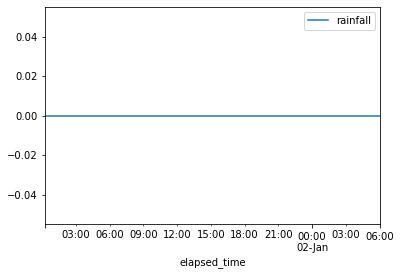

In [14]:
conu_basin.timeseries('street3790', ['rainfall']).plot()

In [9]:
def visualize(node:str, var:str, time_step:int, acc_data:bool):
    ###########################
    from plotly.subplots import make_subplots
    import pandas as pd
    import plotly.express as px
    import plotly.graph_objects as go
    ###########################

    rainfall_step = max(conu_basin.which_time_step()[0], int((self.which_time_step()[0]) * time_step))

    df_plot_0 = conu_basin.subgraphs_timeseries(node, 'rainfall', time_step=time_step)
    df_plot_0 = df_plot_0.resample(f'{rainfall_step}min')
    plot_rainfall_max = 1.5 * df_plot_0['rainfall'].max()

    df_plot_1 = conu_basin.subgraphs_timeseries(node, var,time_step=time_step, acc_data=acc_data )
    plot_var_max = 1.5 * df_plot_1[var].max()
    splitted_var = var.split('_')
    plot_var_legend = ' '.join([word.capitalize() for word in splitted_var][:-1]) + f' [{splitted_var[-1]}]'
        


    subfig = make_subplots(specs=[[{"secondary_y": True}]])

    # create two independent figures with px.line each containing data from multiple columns
    fig = px.bar(df_plot_0, y=['rainfall'])#, render_mode="webgl",)
    fig2 = px.line(df_plot_1, y=var)
    fig2.update_traces(line={'width':5, 'color':'#125AEF'})


    fig2.update_traces(yaxis="y2")


    subfig.add_traces(fig.data + fig2.data)# + fig3.data)
    subfig['layout']['yaxis1'].update(title='Precipitation intensity (mm/h)',range=[0, plot_rainfall_max], autorange='reversed')
    subfig['layout']['yaxis2'].update(title= plot_var_legend, range=[0, plot_var_max], autorange=False)
    subfig.for_each_trace(lambda t: t.update(marker=dict(color=['black'])))
    subfig['layout']['xaxis'].update(title='', tickformat='%d-%b %Hh')
    subfig['layout'].update(plot_bgcolor='white', font={'size':25})#, template='plotly_white')
    subfig.update_xaxes(showline=True, linewidth=3, linecolor='black', mirror=True)
    subfig.update_yaxes(showline=True, linewidth=3, linecolor='black', mirror=True)
    subfig.update_xaxes(ticks="inside", tickwidth=2, tickcolor='black', ticklen=10)
    subfig.update_yaxes(ticks="inside", tickwidth=2, tickcolor='black', ticklen=10)

    subfig['layout'].update(height=600, width=1200)
    subfig.update_layout(showlegend=False)

    return subfig


In [23]:
import torch
import torch_geometric
from torch_geometric import nn
from torch_geometric.utils.convert import from_networkx

import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'torch'

In [ ]:
graph.select_attrs({'nodes': ['target', 'lateral_inflow'], 'edges': ['flow_rate']})
data = from_networkx(graph.pruned_digraph)

In [ ]:
data.target

In [ ]:
data

In [ ]:
torch.nn(np.matrix(pd.DataFrame(graph.nodal_data_dict).T[['lateral_inflow', 'rainfall']]))

In [ ]:
nx.attr_matrix(a, node_attr='depth_above_invert')[0]

In [ ]:
torch.tensor([i for i in graph.nodal_data_query_result])